# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
from viz_cuda import *
from optics_cuda import *
mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

CuPy version 11.0.0
mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
%%time
results = SimulationResult()
simulator = Simulator(results, waves = 1, bundles = 30000000, bundle_size = 1)




CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 18.8 µs


In [3]:
%%time
simulator.run()

CPU times: user 275 ms, sys: 43.8 ms, total: 318 ms
Wall time: 317 ms


In [4]:
print(f"LED emitted photons: {results._source_stage._photons_size}")

LED emitted photons: 30000000


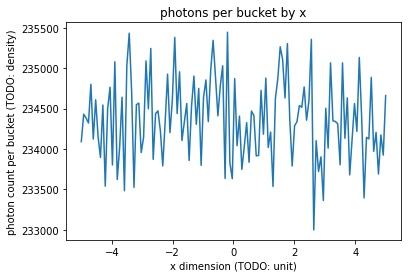

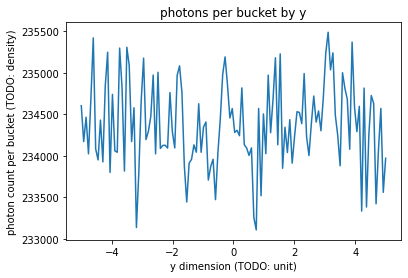

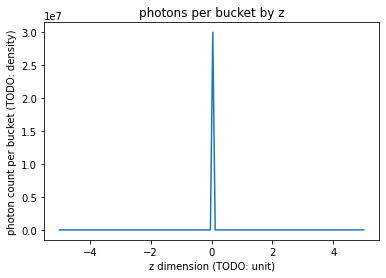

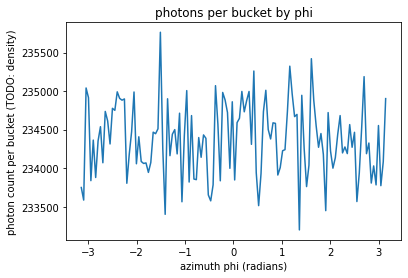

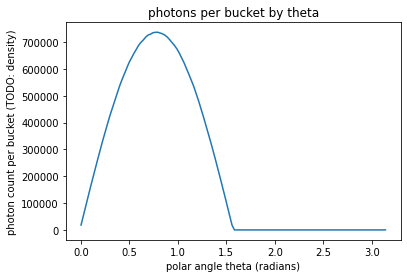

In [5]:
plot_histogram_data(results._source_stage._histogram_r_x)
plot_histogram_data(results._source_stage._histogram_r_y)
plot_histogram_data(results._source_stage._histogram_r_z)
plot_histogram_data(results._source_stage._histogram_ez_phi)
plot_histogram_data(results._source_stage._histogram_ez_theta)

In [6]:
#%%time
#""" Look at the distributions of the generated photons."""
#plot_histogram_slices(photons, "generated photons",
#                      x_min = -source_size/2, x_max = source_size/2,
#                      y_min = -source_size/2, y_max = source_size/2,
#                      z_min = -5, z_max = 5,
#                      theta_max = np.pi/2)